In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, random_split, Dataset,TensorDataset
from sklearn.metrics import mean_squared_error

import random
import joblib
from google.colab import files
import matplotlib.dates as mdates

In [2]:
import tensorflow as tf

seed = 311
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# To enforce determinism on operations
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
daily = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SDE_driven/savè.xlsx')

In [5]:
#Calibration data
discharge = daily.iloc[:1280, 0].to_numpy()
plui = daily.iloc[:1280, 1].to_numpy()
etp = daily.iloc[:1280, 2].to_numpy()

#Validation data
discharge1 = daily.iloc[1280:, 0].to_numpy()
plui1 = daily.iloc[1280:, 1].to_numpy()
etp1 = daily.iloc[1280:, 2].to_numpy()

In [6]:
discharge[0]

np.float64(0.0640000030398369)

In [7]:
#NSE, RMSE, R2
def nash_sutcliffe_efficiency(observed, simulated):
    obs_mean = np.mean(observed)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - obs_mean) ** 2)

    nse = 1 - (numerator / denominator)
    return nse

def calculate_rmse(observed, predicted):

    rmse = np.sqrt(np.mean((observed - predicted)**2))
    return rmse

def calculate_r2(observed, predicted):

    mean_observed = np.mean(observed)
    mean_predicted = np.mean(predicted)

    numerator = np.sum((observed - mean_observed) * (predicted - mean_predicted))
    denominator = np.sqrt(np.sum((observed - mean_observed)**2)) * np.sqrt(np.sum((predicted - mean_predicted)**2))

    r2 = (numerator / denominator)**2
    return r2


GR4J

In [8]:
GR6J = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HyMoLAP/Paper/Save/GR6J_cal_save.xlsx')
GR6J_val = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HyMoLAP/Paper/Save/GR6J_val_save.xlsx')

simGR6J = GR6J.to_numpy()
simGR6J_val = GR6J_val.to_numpy()

simGR6J = simGR6J.flatten()
simGR6J_val = simGR6J_val.flatten()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

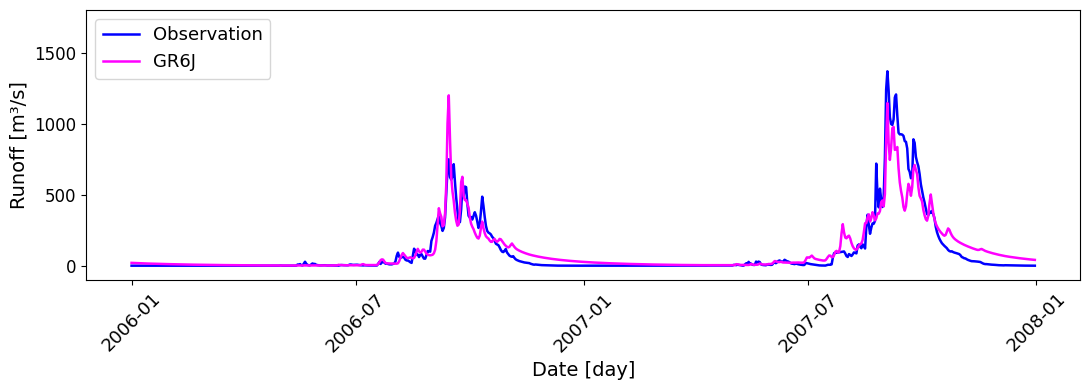

In [9]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11, 4))

# Plot observed and simulated discharge
ax.plot(time, discharge1, 'b', label='Observation', linewidth=1.8)
ax.plot(time, simGR6J_val, 'magenta', label='GR6J', linewidth=1.8)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=13)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Runoff [m³/s]', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.set_ylim(-100, 1800)
ax.set_yticks(np.arange(0, 1800, 500))

# Add legend
ax.legend(loc='upper left', fontsize=13)

# Disable grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("GR6J.jpeg", format='jpeg', dpi=700)

files.download("GR6J.jpeg")

# Show plot
plt.show()


In [10]:
#Calibration
simGR4J = simGR6J.flatten()
print('nashe=',nash_sutcliffe_efficiency(discharge[1:], simGR4J[1:]))
print('rmse=',calculate_rmse(discharge[1:], simGR4J[1:]))
print('r2=',calculate_r2(discharge[1:], simGR4J[1:]))

nashe= 0.7796052987924641
rmse= 110.69085678078063
r2= 0.797967936337851


In [11]:
#Validation
simGR4J_val = simGR6J_val.flatten()
print('nashe=',nash_sutcliffe_efficiency(discharge1[1:], simGR4J_val[1:]))
print('rmse=',calculate_rmse(discharge1[1:], simGR4J_val[1:]))
print('r2=',calculate_r2(discharge1[1:], simGR4J_val[1:]))

nashe= 0.862147960777823
rmse= 79.08864194440767
r2= 0.876632310222414


In [12]:
Residu =  discharge - simGR6J
Residu1 = discharge1 - simGR6J_val

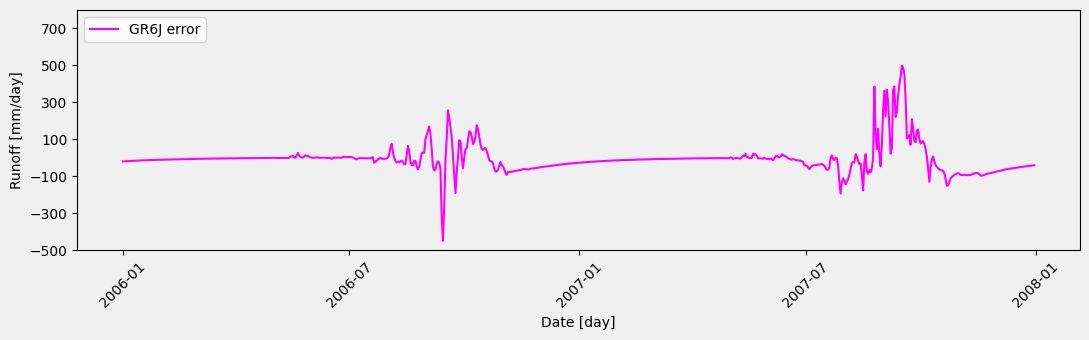

In [13]:
# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11., 3.5))

# Background color
fig.patch.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

# Plot observed and simulated discharge
#ax.plot(time, discharge1, 'b',  label='Observation', linewidth=1.5)
ax.plot(time,Residu1, 'magenta', label='GR6J error', linewidth=1.5)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45)
ax.set_xlabel('Date [day]')

# Y-axis parameters
ax.set_ylabel('Runoff [mm/day]')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylim(-500, 800)
ax.set_yticks(np.arange(-500, 800, 200))

# Add legend
ax.legend(loc='upper left')

# Show grid
# plt.grid(True)

# Avoid overlaps
plt.tight_layout()


#files.download("Cauqueness_GR4J.jpeg")

# Show plot
plt.show()


Residual_GR4J_KAN

In [14]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/KAN')

In [15]:
# import tensorflow as tf

# from torch.utils.data import DataLoader, random_split, Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from utils import EarlyStopping,KAN,KANLinear,kan_prediction_plots
# from google.colab import files
# mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = True
# import seaborn as sns
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
np.random.seed(142)

Wavelet

In [16]:
# Create DataFrame for training (calibration)
data_train = pd.DataFrame({
    'Qsim': simGR4J,
    #'prec': plui,
    #'pet': etp,

    'target': Residu
})

# Create DataFrame for validation (test)
data_test = pd.DataFrame({
    'Qsim': simGR4J_val,
    #'prec': plui1,
    #'pet': etp1,

    'target': Residu1
})

# Concatenate the two DataFrames (calibration + validation)
data = pd.concat([data_train, data_test], ignore_index=True)


In [17]:
 !pip install PyWavelets

In [18]:
import pywt

In [19]:
# Wavelet transformation function
def wavelet_transform(data, wavelet='coif1', level=6):
        coeffs = pywt.wavedec(data, wavelet, level=level)
        approx_coeffs = coeffs[0]
        transformed_data = pywt.waverec([approx_coeffs] + [None]*(len(coeffs)-1), wavelet)
        return transformed_data[:len(data)]


In [20]:
# Exclude the last column ('target')
columns_to_transform = data.columns[:-1]  # All columns except the last one
data_transformed = data[columns_to_transform].apply(lambda x: wavelet_transform(x, wavelet='db2', level=5), axis=0)

# Reattach the 'target' column without transformation
data_transformed['target'] = data['target']

# Keep the column names
data_transformed = pd.DataFrame(data_transformed, columns=data.columns)

# Convert to pd.DataFrame
data = pd.DataFrame(data_transformed)

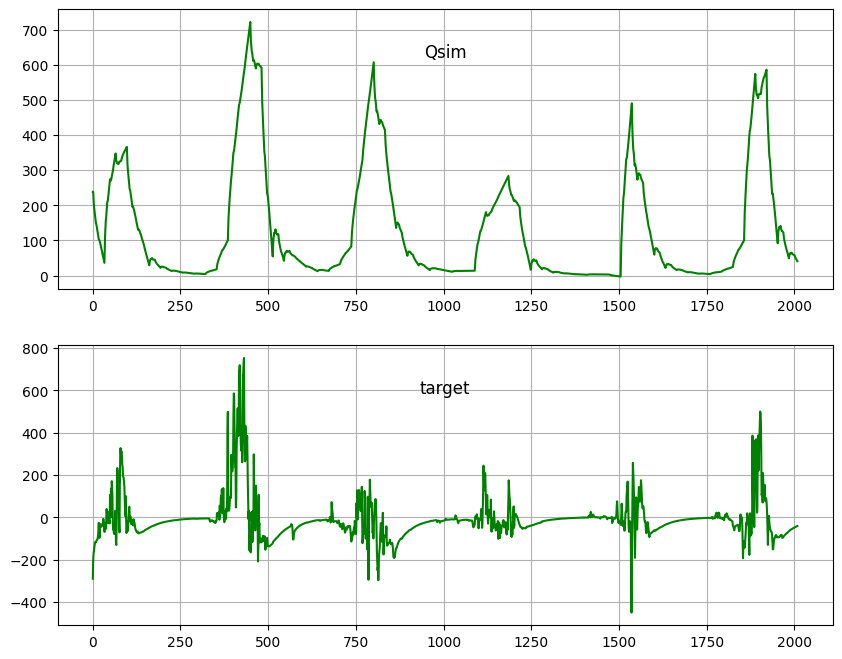

In [21]:
plt.figure(figsize=(10,8))
list_vars = data.columns
for i, var in enumerate(list_vars):
  plt.subplot(data.shape[1], 1, i+1)
  plt.plot(data[var], color='green')
  plt.title(var,y=0.8)

In [22]:
def Make_tidydata_for_kan(data,scaler,data_type="full"):
    if data_type=="full":
        data= data.sort_index()
        data[data.columns] = scaler.fit_transform(data[data.columns])
        # print("data:",data.shape)
    # Splitting the dataset into training, validation, and test sets
    train_size = 1280
    val_size = 730
    #Train_val_test sets
    Xy_train = data[:train_size]
    Xy_val= data[train_size:]
    return [Xy_train,Xy_val]

def data_loading(Xy):
    X, y = Xy.values[:, :-1], Xy.values[:, -1]
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    dataset = TensorDataset(X, y)

    batch_size = len(dataset)  # un seul batch avec tout

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    return loader


In [23]:
# Function to make predictions on a complete DataLoader
def predict_all(model, loader):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            y_pred = model(X_batch, update_grid=False)
            predictions.append(y_pred)
            targets.append(y_batch)

    predictions = torch.cat(predictions, dim=0).numpy().flatten()
    targets = torch.cat(targets, dim=0).numpy().flatten()
    return predictions, targets


def train_test_loop_for_Q(data, epochs, scaler, scaler_y, layers_hidden=[9, 39, 1]):
    import copy

    data_copy = data.copy()

    list_data = Make_tidydata_for_kan(data_copy, scaler)
    train_loader, val_loader = [data_loading(d) for d in list_data]

    input_size = data_copy.shape[1] - 1
    local_layers_hidden = layers_hidden.copy()
    local_layers_hidden[0] = input_size

    Kan_network = KAN(layers_hidden=local_layers_hidden).to(torch.float32)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(Kan_network.parameters(), lr=0.001)
    Kan_network.train()

    best_val_nse = -np.inf  # very low initialization
    best_model_state = None  # variable to store the best model

    for epoch in range(epochs):
        epoch_train_loss = 0
        epoch_val_loss = 0

        # Training
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = Kan_network(X_batch, update_grid=False)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_loader)

        # Validation
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred_ = Kan_network(X_batch, update_grid=False)
                loss_ = criterion(y_pred_, y_batch)
                epoch_val_loss += loss_.item()

        avg_val_loss = epoch_val_loss / len(val_loader)

        # NSE
        y_train_pred, y_train_true = predict_all(Kan_network, train_loader)
        y_val_pred, y_val_true = predict_all(Kan_network, val_loader)

        y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
        y_train_true = scaler_y.inverse_transform(y_train_true.reshape(-1, 1)).flatten()
        y_val_pred = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
        y_val_true = scaler_y.inverse_transform(y_val_true.reshape(-1, 1)).flatten()

        nse_train = nash_sutcliffe_efficiency(y_train_true, y_train_pred)
        nse_val = nash_sutcliffe_efficiency(y_val_true, y_val_pred)

        # If better NSE val achieved, save the model weights
        if nse_val > best_val_nse:
            best_val_nse = nse_val
            best_model_state = copy.deepcopy(Kan_network.state_dict())

        if epoch % 50 == 0:
            print(f"Epoch [{epoch}/{epochs}] | Train MSE: {avg_train_loss:.4f} | Val MSE: {avg_val_loss:.4f} | Train NSE: {nse_train:.4f} | Val NSE: {nse_val:.4f}")

    # Load the weights of the best model
    Kan_network.load_state_dict(best_model_state)

    # Final predictions with the best model
    y_train_pred, y_train_true = predict_all(Kan_network, train_loader)
    y_val_pred, y_val_true = predict_all(Kan_network, val_loader)

    y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_train_true = scaler_y.inverse_transform(y_train_true.reshape(-1, 1)).flatten()
    y_val_pred = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_true = scaler_y.inverse_transform(y_val_true.reshape(-1, 1)).flatten()

    nse_train = nash_sutcliffe_efficiency(y_train_true, y_train_pred)
    nse_val = nash_sutcliffe_efficiency(y_val_true, y_val_pred)

    print(f"\n Final NSE Train (best model) : {nse_train:.4f} | Final NSE Val (best model) : {nse_val:.4f}")

    return Kan_network, y_train_pred, y_val_pred


In [24]:
# Prepare the scaler for features
scaler = StandardScaler()

# Prepare the scaler for the target Qmm
scaler_y = StandardScaler()

# Data and number of epochs
data, epochs = data, 700
print(data.shape)

# Fit the scaler for the target (Q): last column
scaler_y.fit(data.iloc[:, -1].values.reshape(-1, 1))

# Train the model (predicting Q)
model, res_pred_train, res_pred_test = train_test_loop_for_Q(data, epochs, scaler, scaler_y, layers_hidden=[1, 256, 1])


(2010, 2)
Epoch [0/700] | Train MSE: 1.2276 | Val MSE: 0.5978 | Train NSE: 0.0214 | Val NSE: 0.0344
Epoch [50/700] | Train MSE: 1.0488 | Val MSE: 0.4453 | Train NSE: 0.1388 | Val NSE: 0.2806
Epoch [100/700] | Train MSE: 1.0031 | Val MSE: 0.3771 | Train NSE: 0.1762 | Val NSE: 0.3909
Epoch [150/700] | Train MSE: 0.9716 | Val MSE: 0.3386 | Train NSE: 0.2015 | Val NSE: 0.4531
Epoch [200/700] | Train MSE: 0.9666 | Val MSE: 0.3326 | Train NSE: 0.2055 | Val NSE: 0.4627
Epoch [250/700] | Train MSE: 0.9643 | Val MSE: 0.3301 | Train NSE: 0.2074 | Val NSE: 0.4668
Epoch [300/700] | Train MSE: 0.9606 | Val MSE: 0.3273 | Train NSE: 0.2105 | Val NSE: 0.4713
Epoch [350/700] | Train MSE: 0.9551 | Val MSE: 0.3244 | Train NSE: 0.2150 | Val NSE: 0.4760
Epoch [400/700] | Train MSE: 0.9510 | Val MSE: 0.3231 | Train NSE: 0.2183 | Val NSE: 0.4781
Epoch [450/700] | Train MSE: 0.9489 | Val MSE: 0.3242 | Train NSE: 0.2200 | Val NSE: 0.4763
Epoch [500/700] | Train MSE: 0.9477 | Val MSE: 0.3241 | Train NSE: 0.2210

In [25]:
# Validation Performance evaluation

nse_value = nash_sutcliffe_efficiency(Residu1, res_pred_test)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(Residu1, res_pred_test)
print('RMSE =', rmse)

r2 = calculate_r2(Residu1, res_pred_test)
print('R² =', r2)

Nash-Sutcliffe Efficiency (NSE): 0.48178559430467494
RMSE = 56.65989908450866
R² = 0.4869994766424622


Residu plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

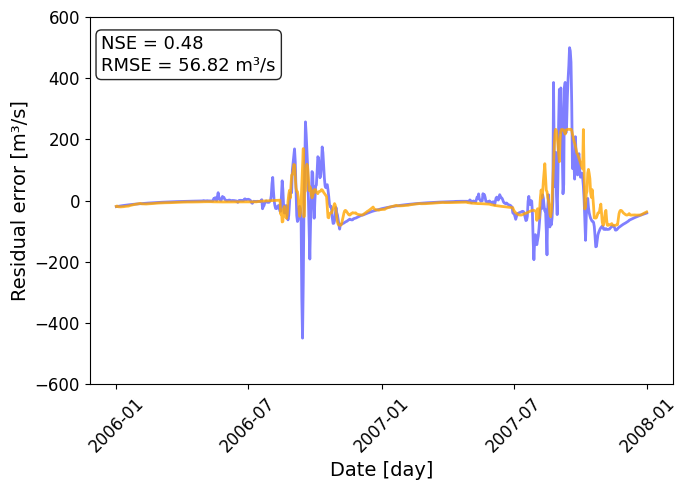

In [26]:
# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Plot observed and simulated discharge
ax.plot(time, Residu1, color='b', alpha=0.5, label=r"$\mathrm{Res}^{\mathrm{GR6J}}$", linewidth=2)
ax.plot(time, res_pred_test, color='orange', alpha=0.8, label='Prediction (WKAN)', linewidth=2)

# Annotation
plt.text(0.02, 0.95, f"NSE = {0.48}\nRMSE = {56.82} m³/s",
         transform=plt.gca().transAxes, fontsize=13,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=12)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Residual error [m³/s]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim(-600, 600)
ax.set_yticks(np.arange(-600, 601, 200))

# Add legend
#ax.legend(fontsize=13)

# Remove grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("Res_WKAN.jpeg", format='jpeg', dpi=700)

# Télécharger le fichier dans Google Colab
from google.colab import files
files.download('Res_WKAN.jpeg')

# Show plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

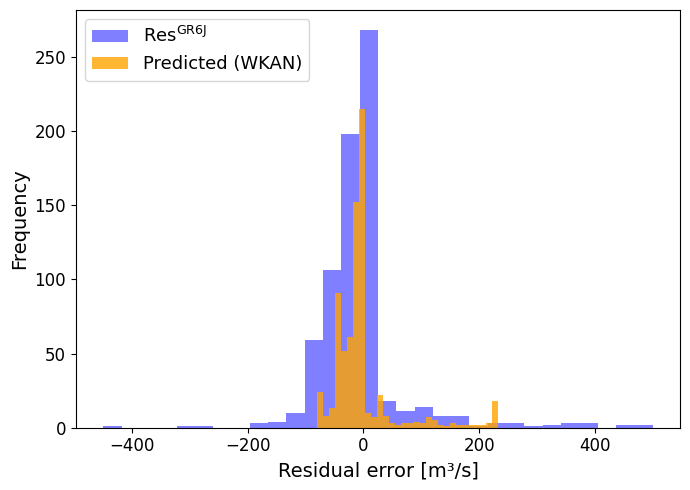

In [27]:
# Plot
plt.figure(figsize=(7, 5))
plt.hist(Residu1, bins=30, alpha=0.5, label=r"$\mathrm{Res}^{\mathrm{GR6J}}$", color='b')
plt.hist(res_pred_test, bins=30, alpha=0.8, label='Predicted (WKAN)', color='orange')

# Labels
plt.xlabel('Residual error [m³/s]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Legend et axes
plt.legend(loc='upper left', fontsize=13)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save figure
plt.savefig("His_WKAN.jpeg", format='jpeg', dpi=700)
files.download('His_WKAN.jpeg')

plt.show()


Data reconstruction

In [28]:
final_pred = simGR6J + res_pred_train
final_pred1 = simGR6J_val + res_pred_test

In [29]:
# Training Performance evaluation

nse_value = nash_sutcliffe_efficiency(discharge, final_pred)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge, final_pred)
print('RMSE =', rmse)

r2 = calculate_r2(discharge, final_pred )
print('R² =', r2)

Nash-Sutcliffe Efficiency (NSE): 0.8306742731203499
RMSE = 96.99703076380763
R² = 0.8306880627268064


In [30]:
# Validation Performance evaluation

nse_value = nash_sutcliffe_efficiency(discharge1, final_pred1)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1, final_pred1)
print('RMSE =', rmse)

r2 = calculate_r2(discharge1, final_pred1)
print('R² =', r2)

Nash-Sutcliffe Efficiency (NSE): 0.929170234258921
RMSE = 56.65989908450866
R² = 0.9330363798297903


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

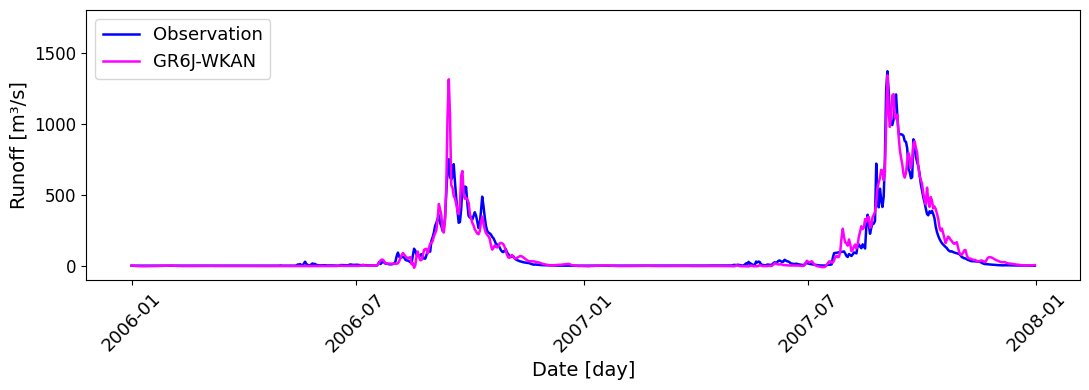

In [31]:
# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11, 4))

# Plot observed and simulated discharge
ax.plot(time, discharge1, 'b', label='Observation', linewidth=1.8)
ax.plot(time, final_pred1, 'magenta', label='GR6J-WKAN', linewidth=1.8)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=13)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Runoff [m³/s]', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.set_ylim(-100, 1800)
ax.set_yticks(np.arange(0, 1800, 500))

# Add legend
ax.legend(loc='upper left', fontsize=13)

# Disable grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("GR6J_WKAN.jpeg", format='jpeg', dpi=700)

files.download('GR6J_WKAN.jpeg')

# Show plot
plt.show()


In [32]:
# Create a DataFrame to save the mean trajectory into an Excel file
df_mean_trajectory = pd.DataFrame({'GR6J_WKAN': final_pred1})

# Save to an Excel file
df_mean_trajectory.to_excel('GR6J_WKAN.xlsx', index=False)

# Download the file in Google Colab
#files.download('GR6J_WKAN.xlsx')